In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def smooth(scalars, weight=0.9):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [35]:
p_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/age'
p_out_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/age'

In [36]:
sites = ['ADHD1',
        'ADHD3',
        'ADHD5',
        'ADHD6',
        'HSJ',
        'NYU',
        'Svip1',
        'Svip2',
        'SZ1',
        'SZ2',
        'SZ3',
        'SZ6',
        'UCLA_CB',
        'UCLA_DS1',
        'UKBB11025',
        'UKBB11026',
        'UKBB11027',
        'USM']

In [37]:
sns.set_style('whitegrid')

## Single Task

In [38]:
res_single = {}
for site in sites:
    p = os.path.join(p_parent,f'{site}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[site]
        folds.append(df)
    res_single[site] = folds

In [39]:
# INDIVIDUAL PLOTS
"""
for site in res_single:
    fig,ax = plt.subplots(figsize=(10,3))
    #plt.ylim(0,100)
    plt.xlim(0,100)
    for i,df in enumerate(res_single[site]):
        sns.lineplot(x=df.index,y=smooth(df['Loss/test']),data=df,label=f'fold_{i}')
    plt.title(f'{site} - Age')
    #plt.hlines(50,-5,105,ls='--',color='black')
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'figures/{site}.png'),dpi=300)
    plt.show()
"""

'\nfor site in res_single:\n    fig,ax = plt.subplots(figsize=(10,3))\n    #plt.ylim(0,100)\n    plt.xlim(0,100)\n    for i,df in enumerate(res_single[site]):\n        sns.lineplot(x=df.index,y=smooth(df[\'Loss/test\']),data=df,label=f\'fold_{i}\')\n    plt.title(f\'{site} - Age\')\n    #plt.hlines(50,-5,105,ls=\'--\',color=\'black\')\n    plt.legend(loc="upper right")\n    plt.tight_layout()\n    plt.savefig(os.path.join(p_out_parent,f\'figures/{site}.png\'),dpi=300)\n    plt.show()\n'

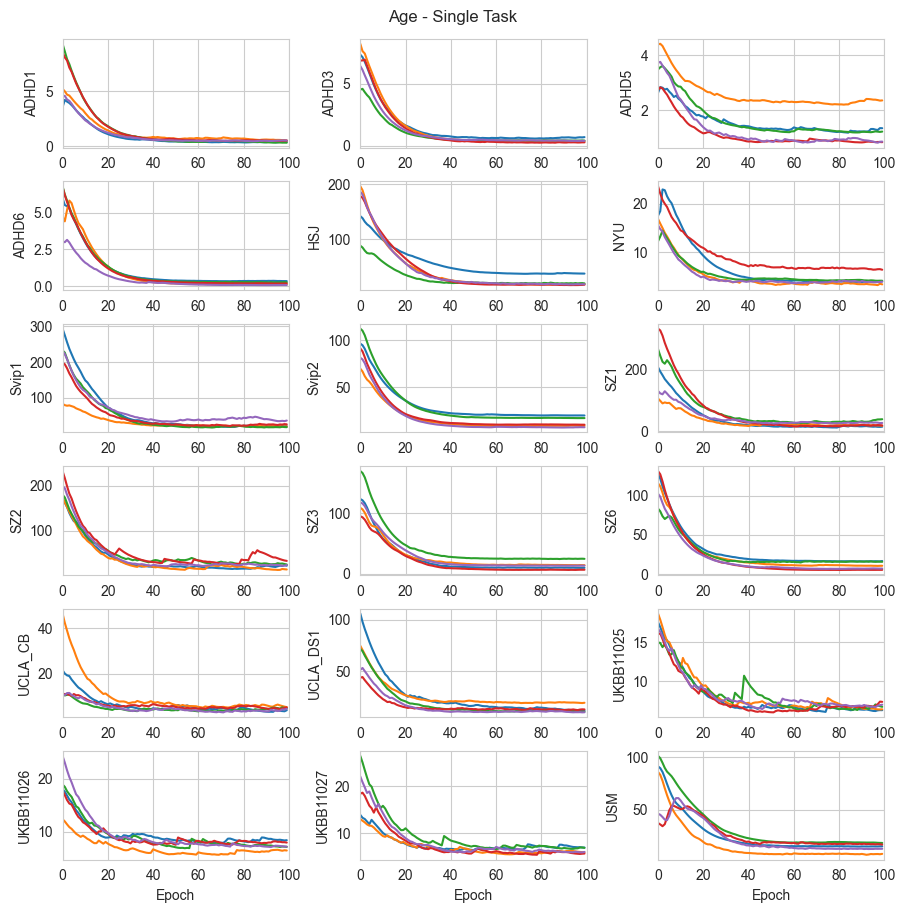

In [57]:
# TABLE PLOTS
# Forget the legend because the folds don't mean anything in this context anyways
fig,ax = plt.subplots(6,3,figsize=(9,9))
tuples = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2),(4,0),(4,1),(4,2),(5,0),(5,1),(5,2)]
for j,site in enumerate(res_single):
    for i,df in enumerate(res_single[site]):
        sns.lineplot(x=df.index,y=smooth(df['Loss/test']),data=df,label=f'fold_{i}',ax=ax[tuples[j]])
    if j==0: 
        h, l = ax[tuples[j]].get_legend_handles_labels()
    ax[tuples[j]].get_legend().remove()
    ax[tuples[j]].set_ylabel(f'{site}')
    ax[tuples[j]].set_xlim(0,100)

    if (j == 15) | (j == 16)| (j == 17):
        ax[tuples[j]].set_xlabel('Epoch')

plt.suptitle('Age - Single Task',y=1)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(p_out_parent,f'figures/ST_training.png'),dpi=300)
plt.show()

## Multi-Task

In [51]:
n_folds = 5

p = os.path.join(p_parent,'all')
folds = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds.append(df)

In [52]:
# INDIVIDUAL PLOTS
"""
for i,df in enumerate(folds):
    fig,ax = plt.subplots(figsize=(10,4))
    for site in sites:
        sns.lineplot(x=df.index,y=smooth(df[site]['Loss/test']),data=df[site],label=site)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1.025, 1.09))
    plt.title(f'Multi-Task - Age - Fold {i}')

    plt.xlim(0,100)
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'figures/all_fold{i}.png'))
    plt.show()
"""

'\nfor i,df in enumerate(folds):\n    fig,ax = plt.subplots(figsize=(10,4))\n    for site in sites:\n        sns.lineplot(x=df.index,y=smooth(df[site][\'Loss/test\']),data=df[site],label=site)\n    sns.move_legend(ax, "upper left", bbox_to_anchor=(1.025, 1.09))\n    plt.title(f\'Multi-Task - Age - Fold {i}\')\n\n    plt.xlim(0,100)\n    plt.tight_layout()\n    plt.savefig(os.path.join(p_out_parent,f\'figures/all_fold{i}.png\'))\n    plt.show()\n'

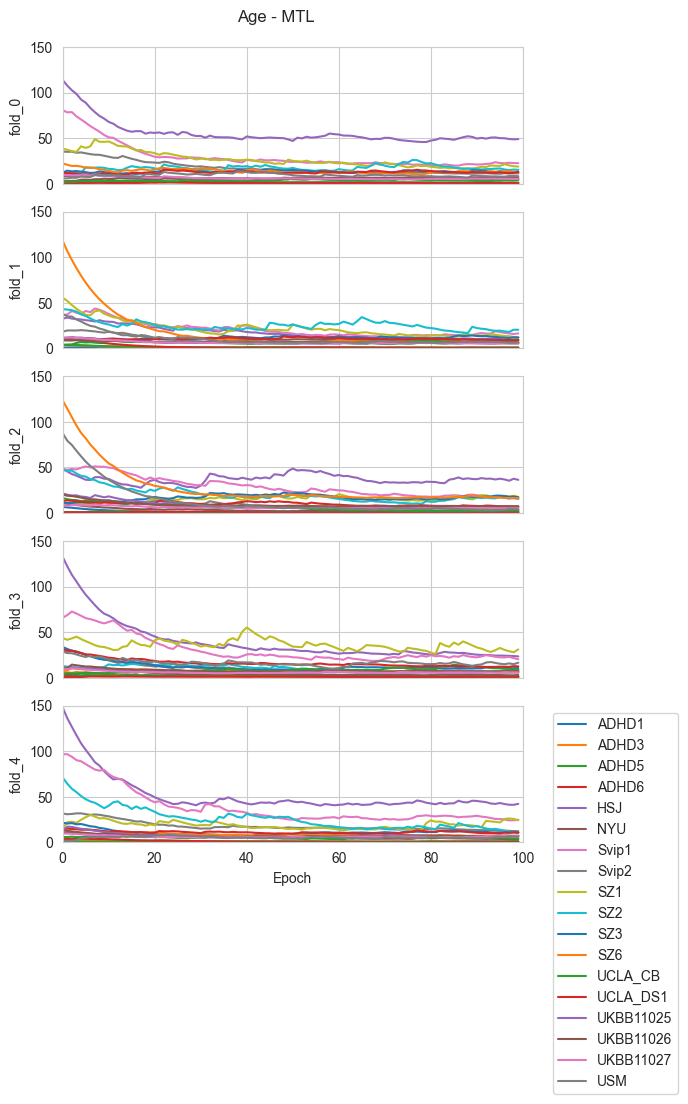

In [54]:
# TABLE PLOTS
fig,ax = plt.subplots(5,1,figsize=(7,11),sharex=True)
for j,df in enumerate(folds):
    for site in sites:
        sns.lineplot(x=df.index,y=smooth(df[site]['Loss/test']),data=df[site],label=site,ax=ax[j])
    ax[j].set_ylabel(f'fold_{j}')
    ax[j].set_xlim(0,100)
    ax[j].set_ylim(0,150)
    #ax[j].set_yticks([0,10,20,30,40,50,60,70,80,90,100])
    #ax[j].set_yticklabels([None,10,None,30,None,50,None,70,None,90,None])

    if j == 4:
        ax[j].set_xlabel('Epoch')
        sns.move_legend(ax[j], "upper left", bbox_to_anchor=(1.05, 1))
    else:
        ax[j].get_legend().remove()
plt.suptitle('Age - MTL',x=0.4,y=0.99)
plt.tight_layout(pad=1)
plt.savefig(os.path.join(p_out_parent,f'figures/MTL_training.png'),dpi=300)
plt.show()

# MTL - no UKBB

In [58]:
n_folds = 5

p = os.path.join(p_parent,'all_no_ukbb')
folds = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds.append(df)

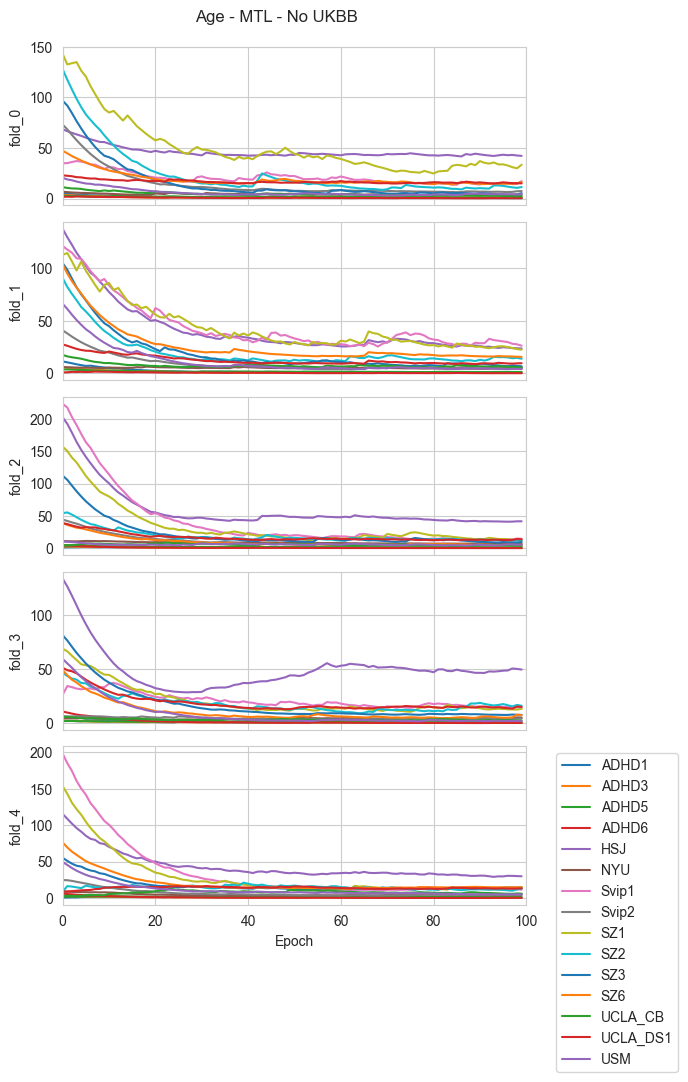

In [62]:
# TABLE PLOTS
sites_no_ukbb = [site for site in sites if site[:4]!='UKBB']
fig,ax = plt.subplots(5,1,figsize=(7,11),sharex=True)
for j,df in enumerate(folds):
    for site in sites_no_ukbb:
        sns.lineplot(x=df.index,y=smooth(df[site]['Loss/test']),data=df[site],label=site,ax=ax[j])
    ax[j].set_ylabel(f'fold_{j}')
    ax[j].set_xlim(0,100)
    #ax[j].set_ylim(0,150)

    if j == 4:
        ax[j].set_xlabel('Epoch')
        sns.move_legend(ax[j], "upper left", bbox_to_anchor=(1.05, 1))
    else:
        ax[j].get_legend().remove()
plt.suptitle('Age - MTL - No UKBB',x=0.4,y=0.99)
plt.tight_layout(pad=1)
plt.savefig(os.path.join(p_out_parent,f'figures/MTL_training_no_ukbb.png'),dpi=300)
plt.show()